## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Read and Understand the Data

In [2]:
leads = pd.read_csv("Leads.csv")

In [3]:
# print the top rows to peek into the data values 
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Check the Column Infos
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Check the Shape of data
leads.shape

(9240, 37)

In [7]:
# Since ProspectId and Lead Number are Identifiers. Check if we have any duplicate values for the two columns
print(leads.duplicated(subset=["Prospect ID"]).sum())
print(leads.duplicated(subset=["Lead Number"]).sum())


0
0


##### There are no duplicate values corresponding to Prospect Id and Lead Number. Since we have looked into the data shape and data values We can now move to EDA 


## EDA

### Null Value Treatment and Data cleaning

In [8]:
# Since ProspectId and Lead Number are unique values we can drop them for the analysis purpose from the data frame.
leads.drop(["Prospect ID", "Lead Number"], 1,inplace=True)

In [9]:
# check for the values of Categorical Columns
for column in leads.columns:
    if leads.dtypes[column] == 'object':
        print(leads[column].value_counts())
        print()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

No     8506
Yes     734
Name: Do Not Email, dtype: int64

No     9238
Yes       2
Name: Do Not Call, dtype: int64

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Pa

Following Columns contain the value as Select
- Specialization
- How did you hear about X Education
- Lead Profile
- City



Select refers to when the user has selected no Value. We can fill this value with np.nan

In [10]:
cols_with_select = ['Specialization','How did you hear about X Education','Lead Profile','City']
for col in cols_with_select:
    leads[col].replace('Select',np.nan,inplace=True)

Following columns have only one value in all the rows.
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque
- Magazine

Since all the rows in these columns will not be of any significance we can drop these columns

In [11]:
single_value_cols = ['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Magazine']
leads.drop(single_value_cols,axis=1, inplace=True)


In [12]:
leads.shape

(9240, 30)

In [13]:
#Check for the null values percentage for each feature
round(100*(leads.isnull().sum()/len(leads)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### Many of the columns contain null values. Check for and drop the columns with values greater than equal to 45%

In [14]:
null_cols = round(100*(leads.isnull().sum()/len(leads)))
null_cols_greate_than_45 = null_cols[null_cols>=45].keys()
null_cols_greate_than_45

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [15]:
leads.drop(null_cols_greate_than_45,axis=1,inplace=True)
leads.shape

(9240, 23)

In [16]:
#Check for the null values percentage again for each feature
round(100*(leads.isnull().sum()/len(leads)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [17]:
round(100*(sum(leads.isnull().sum(axis=1) > 1)/leads.shape[0]),2)

52.98

#### number of rows with the null values makes a huge chunk. so it is not advisable to delete the rows with null values. Also the columns containing the null values are important enough to drop

#### therefore we can change the NaN values to NotProvided for columns with null values greater than 10%


In [18]:
null_cols = round(100*(leads.isnull().sum()/len(leads)))
null_cols_greate_than_10 = null_cols[null_cols>=10].keys()
null_cols_greate_than_10

Index(['Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City'],
      dtype='object')

In [19]:
for column in null_cols_greate_than_10:
    leads[column] = leads[column].fillna('NotProvided')
leads.shape

(9240, 23)

In [20]:
#Check for the null values again 
round(100*(leads.isnull().sum()/len(leads)),2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [21]:
# Lets take another look at the values of Categorical Columns
for column in leads.columns:
    if leads.dtypes[column] == 'object':
        print(leads[column].value_counts())
        print()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

No     8506
Yes     734
Name: Do Not Email, dtype: int64

No     9238
Yes       2
Name: Do Not Call, dtype: int64

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Pa

#### Following observations are for the Categorical values
- Lead Source - Google and google are 2 different values
- Country column has too many different values. we can club the values to India, Outside with NotProvided set to India For value is India for maximum values.


In [22]:
def changeCountry(country):
    if (country=='India') or (country=='NotProvided'):
        return 'India'
    else:
        return 'OutsideIndia'

leads['Country'] = leads.apply(lambda x:changeCountry(x['Country']),axis=1)
leads['Country'].value_counts()

India           8953
OutsideIndia     287
Name: Country, dtype: int64

In [23]:
leads['Lead Source'].replace('google','Google',inplace=True)
leads['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [24]:
# Check the number of records and percentage of records we will lose if we remove the records with null values
print(f"Number of Records - {sum(leads.isnull().sum(axis=1)>1)}")
print(f"Percentage of Records - {round(100*(sum(leads.isnull().sum(axis=1)>1)/leads.shape[0]),2)}")


Number of Records - 137
Percentage of Records - 1.48


#### We can safely remove the rows with null values

In [25]:
leads = leads[leads.isnull().sum(axis=1)<1]
leads.shape

(9074, 23)

In [26]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,No,No,No,No,No,No,Interested in other courses,NotProvided,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,Ringing,NotProvided,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [27]:
# As mentioned in the Data dictionary column Tags is assigned by the sales Team, So we can safely remove the column to make the model more True
leads.drop(["Tags"],axis=1, inplace=True)

### Univariate Analysis

<AxesSubplot:>

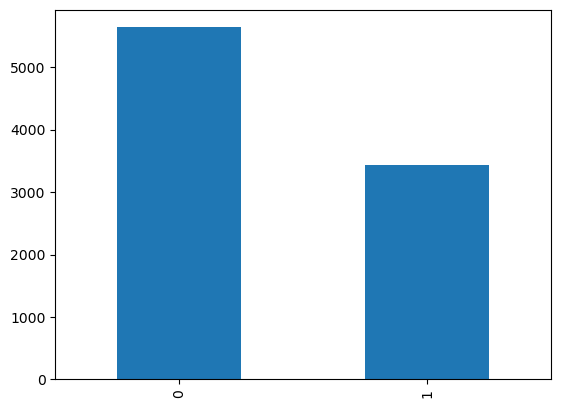

In [28]:
#Check for the distribution of field Converted
leads.Converted.value_counts().plot.bar()

#### There are more not Converted leads than Converted Leads

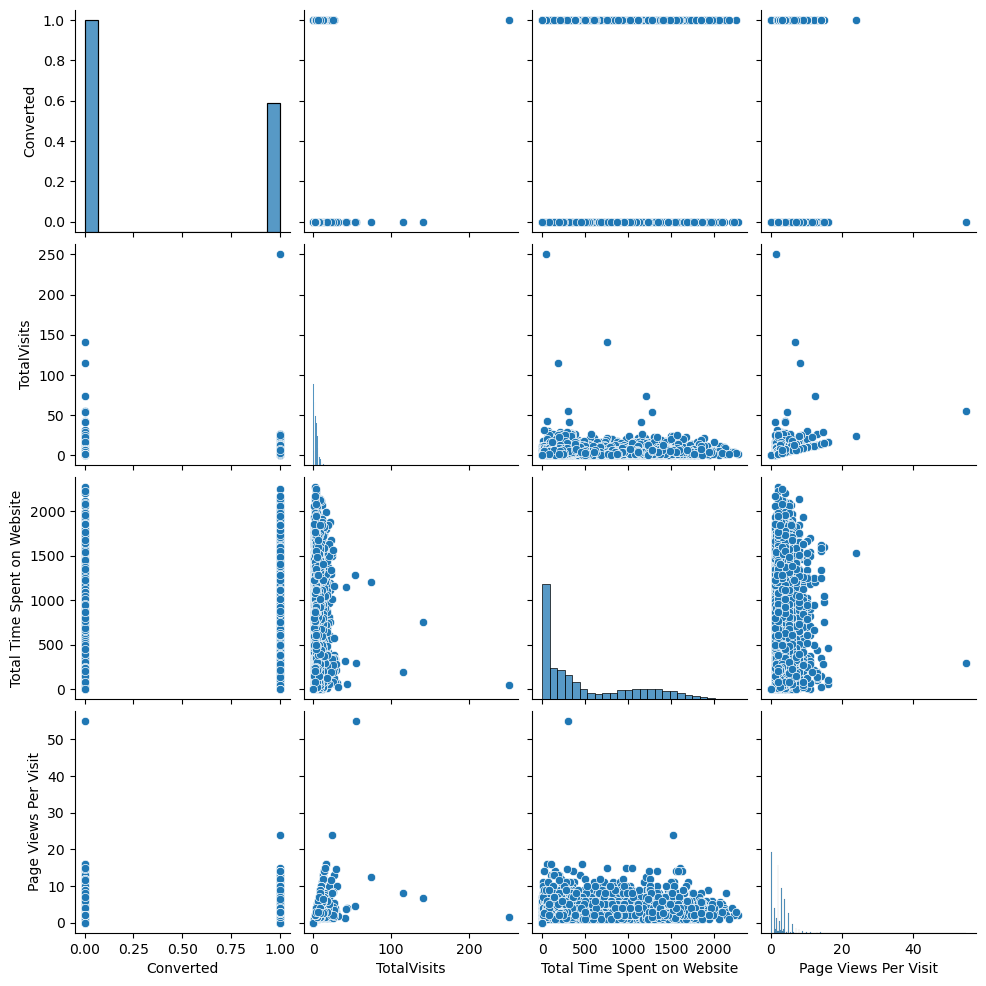

In [29]:
sns.pairplot(leads)

In [30]:
cont_cols = [column for column in leads.columns if leads.dtypes[column]=='float64' or leads.dtypes[column] =='int64']
cat_cols = [column for column in leads.columns if leads.dtypes[column]=='object']    

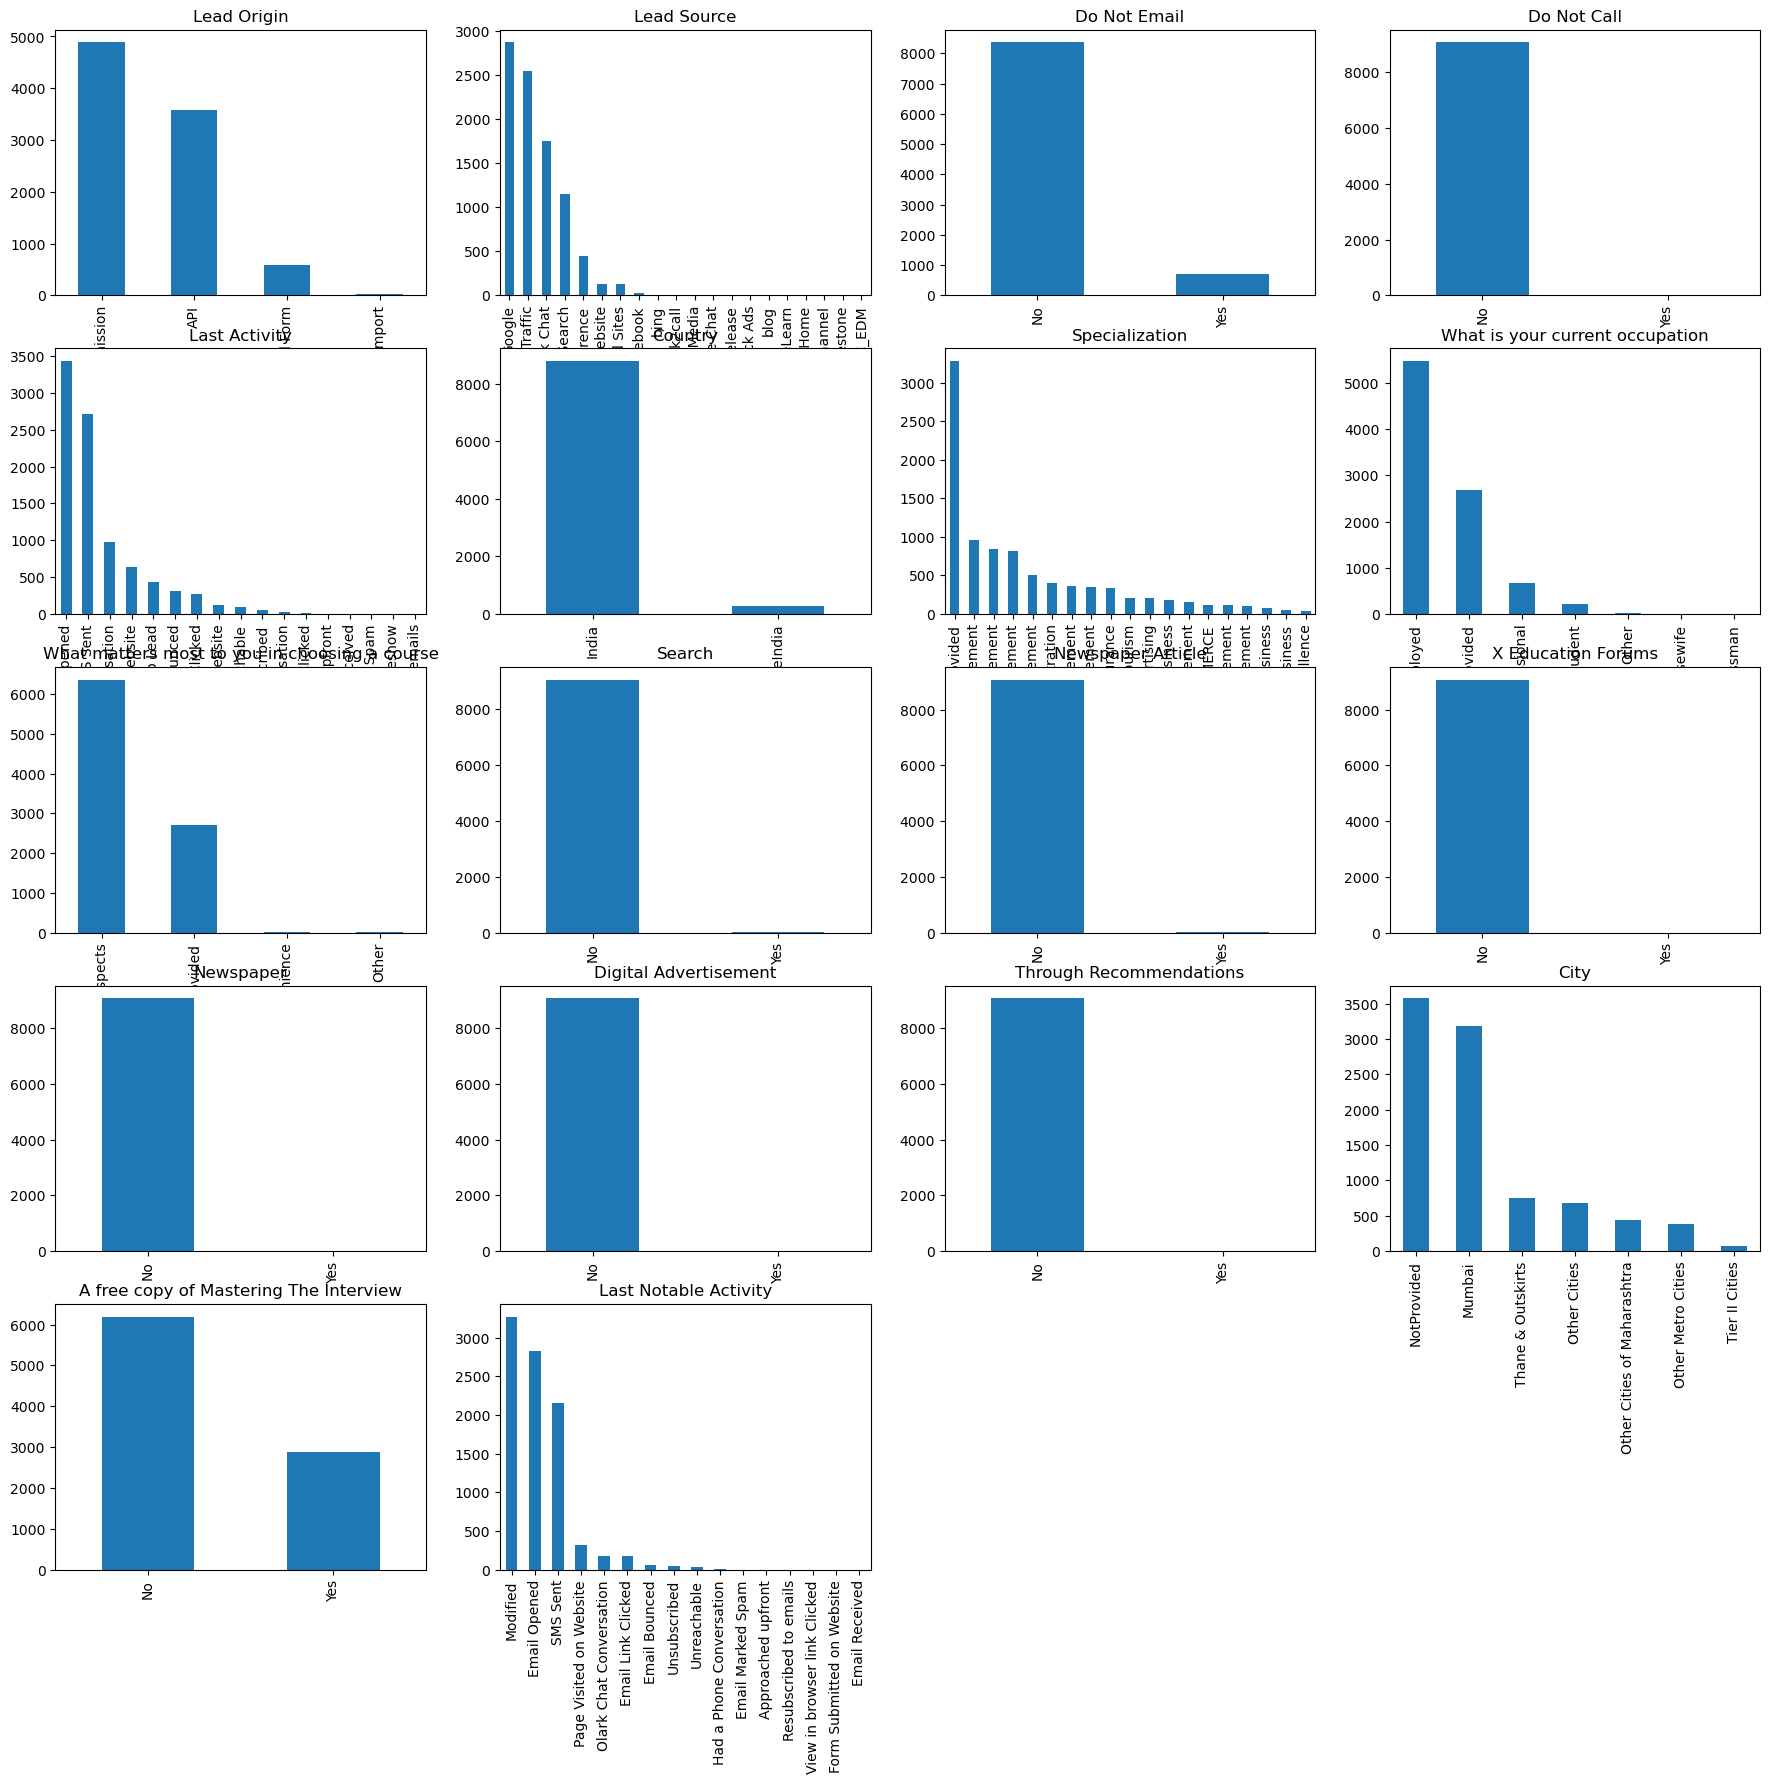

In [31]:
i=1
plt.figure(figsize=(22,20))
for column in cat_cols:
    plt.subplot(5,4,i)
    leads[column].value_counts().plot.bar(title =column)
    i+=1
plt.show()


Values for Following Columns are heavily skewed to one value hence we can drop these columns
- 'Do Not Email'
- 'Do Not Call'
- 'Country'
- 'Search'
- 'Newspaper Article'
- 'X Education Forums'
- 'Digital Advertisement'
- 'Through Recommendations'
- 'Newspaper'


In [32]:
leads.drop(['Do Not Email'
,'Do Not Call'
,'Country'
,'Search'
,'Newspaper Article'
,'X Education Forums'
,'Digital Advertisement'
,'Newspaper'
,'Through Recommendations'],axis=1,inplace=True)

In [33]:
cont_cols = [column for column in leads.columns if leads.dtypes[column]=='float64' or leads.dtypes[column] =='int64']
cat_cols = [column for column in leads.columns if leads.dtypes[column]=='object']    

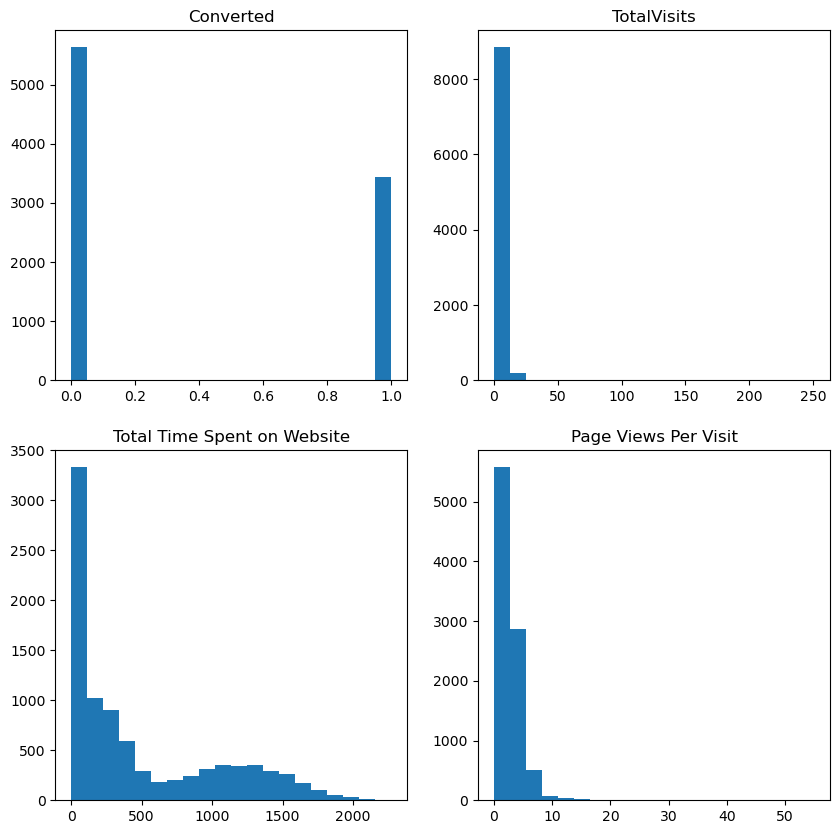

In [34]:
#Continuous Variables
i=1
plt.figure(figsize=(10,10))
for column in cont_cols:
    plt.subplot(2,2,i)
    plt.hist(leads[column],bins=20)
    plt.title(column)
    i+=1
plt.show()

### Bivariate Analysis

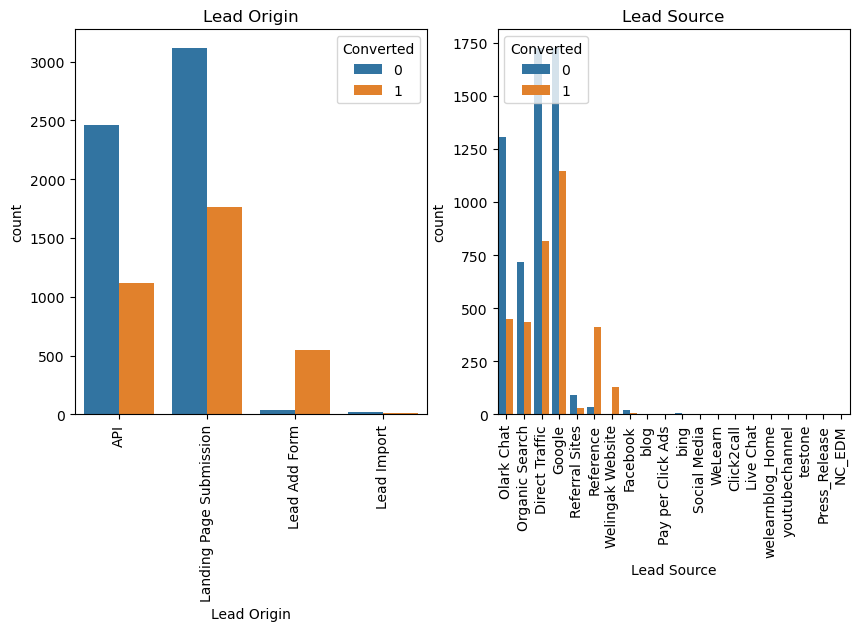

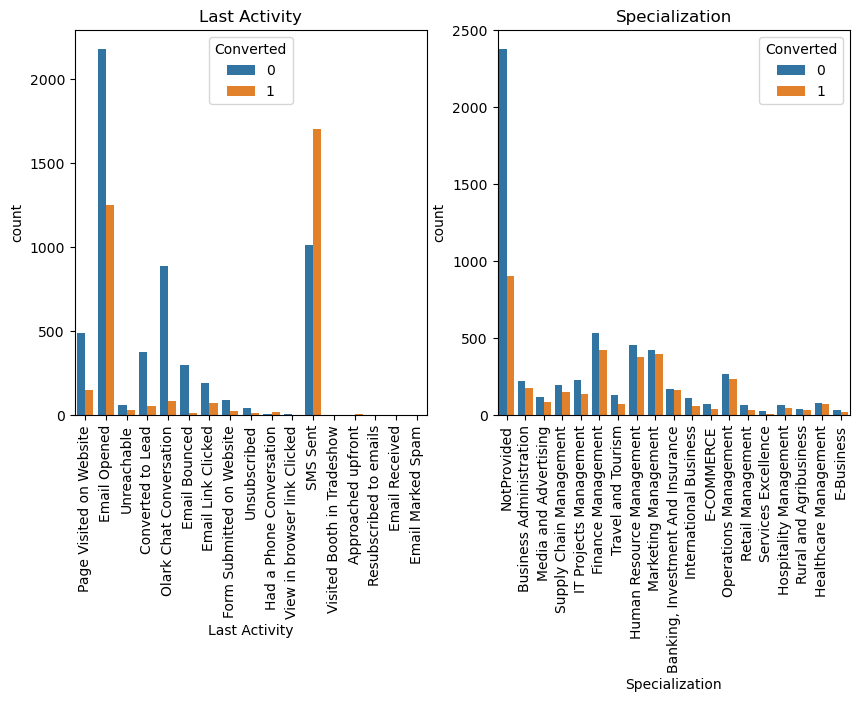

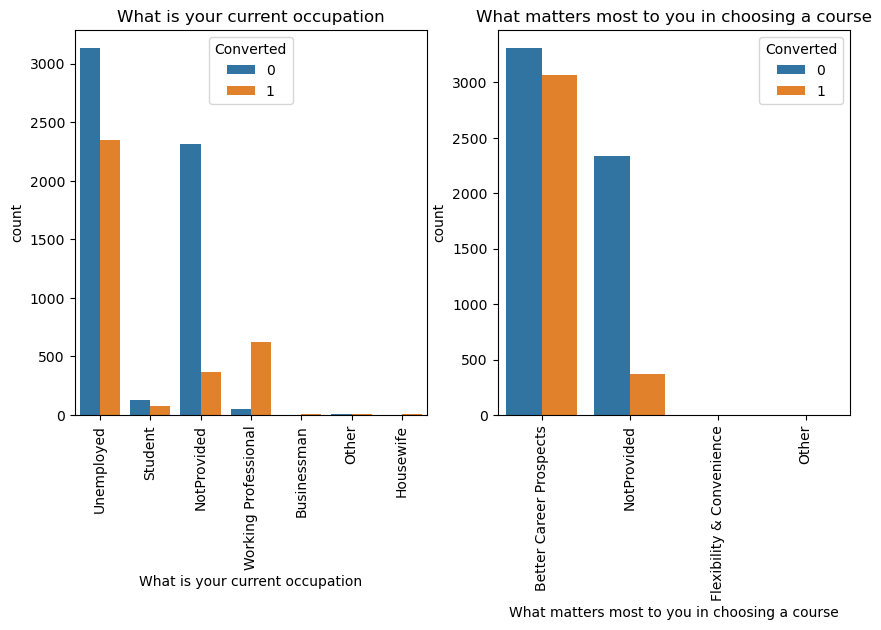

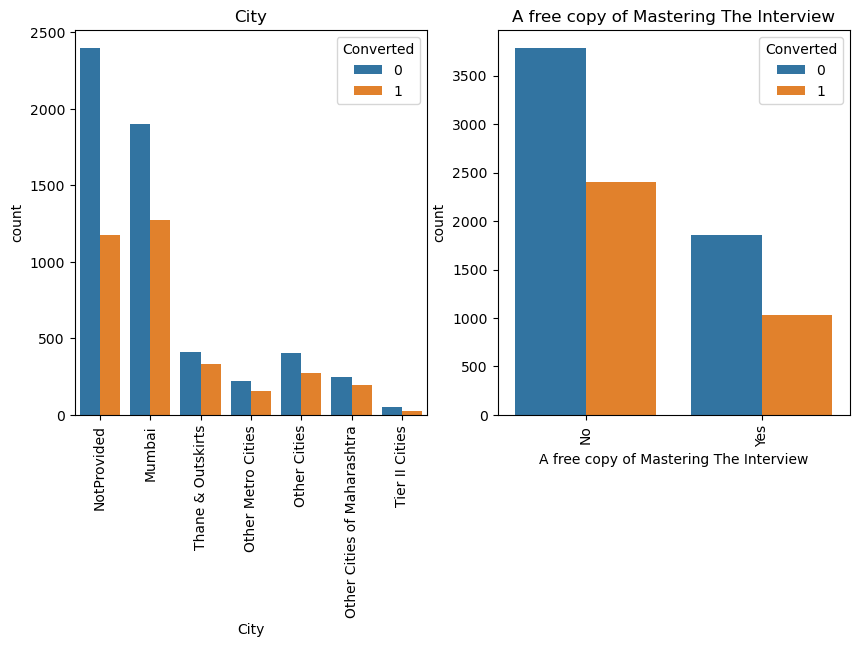

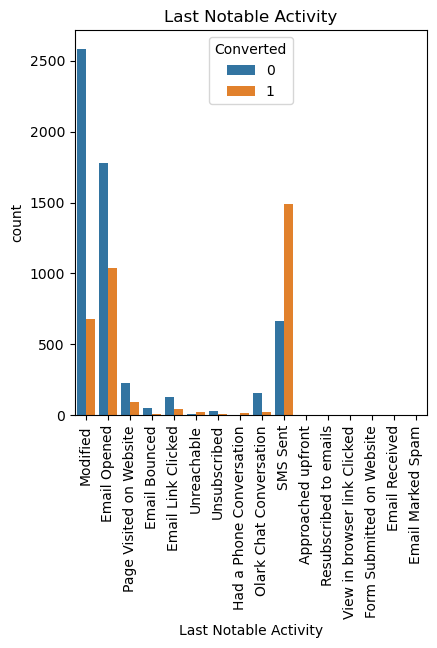

In [35]:
# plot Categorical columns against Converted
def plot_Category_Converted(features,cols):
    plt.figure(figsize=(10 ,5))
    i=1
    for feature in features:
        plt.subplot(1,cols,i)
        sns.countplot(x=feature, hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
        plt.title(feature)
        i+=1
    plt.show()

def chunks(xs, n):
    n = max(1, n)
    return list(xs[i:i+n] for i in range(0, len(xs), n))

for lst in chunks(cat_cols,2):
    plot_Category_Converted(lst,2)

### Multivariate Analysis

In [36]:
# look at the Correlation table 
correlation_leads = leads.corr()
correlation_leads

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.032855,0.359261,0.000260
TotalVisits,0.032855,1.000000,0.219723,0.511068
Total Time Spent on Website,0.359261,0.219723,1.000000,0.318350
Page Views Per Visit,0.000260,0.511068,0.318350,1.000000


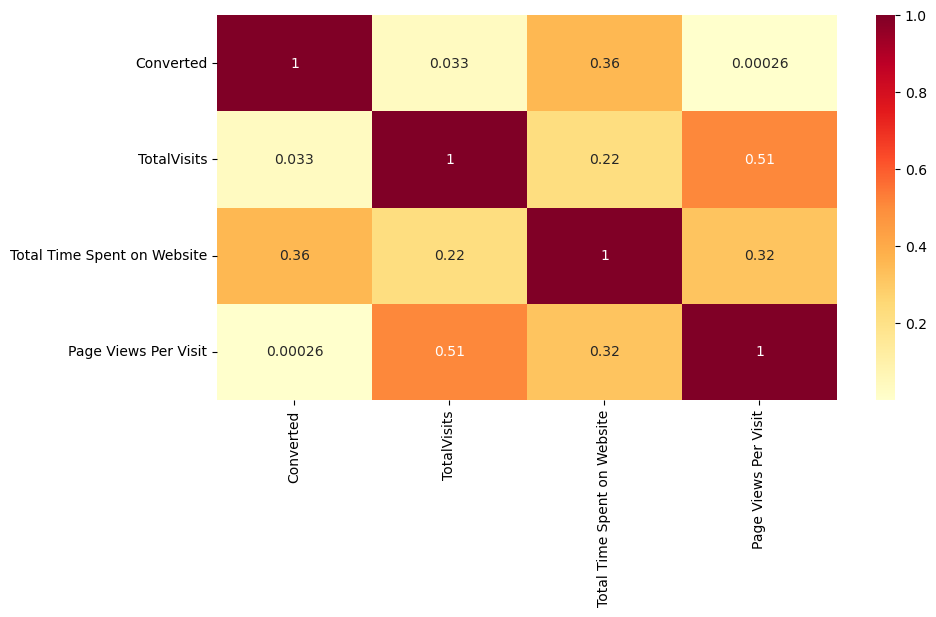

In [37]:
# Plot the Heat Map to view the mutual relationship for the Continuous variable
plt.figure(figsize=(10,5))
sns.heatmap(correlation_leads,annot=True,cmap='YlOrRd')
plt.show()


### Outlier Treatment

In [38]:
continuous_columns = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
continuous_columns.describe(percentiles=[.01,.1,.25,.75,0.9,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000


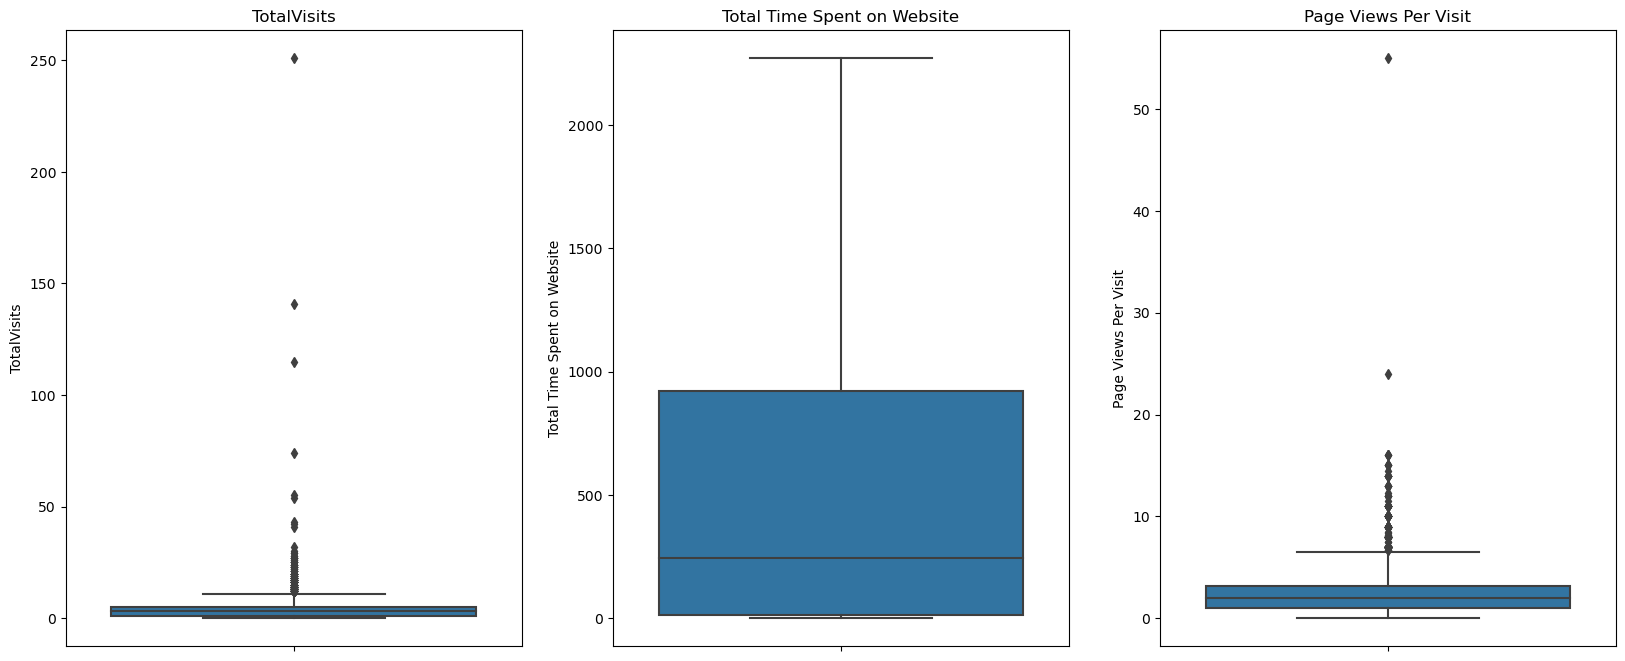

In [39]:
# Plot the Box Plots for Continuous Columns
i=1
plt.figure(figsize=(20,8))
for column in continuous_columns:
    plt.subplot(1,3,i)
    sns.boxplot(y=leads[column])
    plt.title(column)
    i+=1
plt.show()

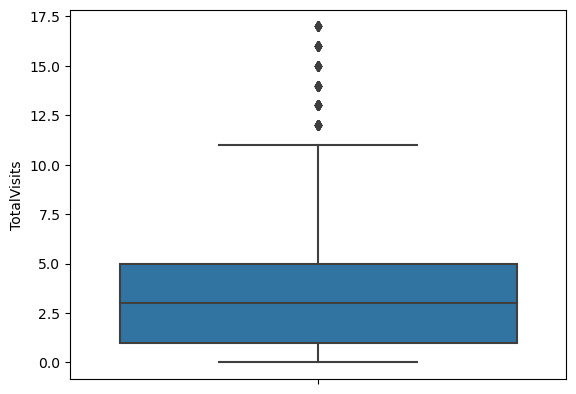

In [40]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

### Dummy Variables Creation

In [41]:
cat_cols = leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [42]:
#Create dummy variables for non Binary Categorical values and concat in Dataframe
dummies = pd.get_dummies(leads[['Lead Origin'
,'Specialization' 
,'Lead Source'
,'Last Activity'
,'What is your current occupation'
,'What matters most to you in choosing a course'
,'A free copy of Mastering The Interview'
,'Last Notable Activity']],drop_first=True)
leads_dummies = pd.concat([leads,dummies],axis=1)
leads_dummies.shape

(8991, 94)

In [43]:
# drop original columns
leads_dummies.drop(['Lead Origin'
,'Specialization' 
,'Lead Source'
,'Last Activity'
,'City'
,'What matters most to you in choosing a course'
,'What is your current occupation'
,'A free copy of Mastering The Interview'
,'Last Notable Activity'],axis=1,inplace=True)
leads_dummies.shape 

(8991, 85)

## Modelling

### Test Train Split

In [44]:
# Create the Train and Test Split for independent and Dependent variables
from sklearn.model_selection import train_test_split
leads_Train, leads_Test = train_test_split(leads_dummies,train_size=0.7,test_size=0.3,random_state=10)


In [45]:
print (leads_Train.shape) 
print(leads_Test.shape)

(6293, 85)
(2698, 85)


In [46]:
# Scale the numerical variables with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
leads_Train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(leads_Train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
leads_Train.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3523,0,0.117647,0.057218,0.0625,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3267,1,0.000000,0.000000,0.0000,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5653,1,0.117647,0.404049,0.1250,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5072,0,0.000000,0.000000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3704,0,0.235294,0.043134,0.2500,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
y_Train = leads_Train.pop('Converted')
X_Train = leads_Train
y_Test = leads_Test.pop('Converted')
X_Test = leads_Test

In [48]:
X_Train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3523,0.117647,0.057218,0.0625,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3267,0.000000,0.000000,0.0000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5653,0.117647,0.404049,0.1250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5072,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3704,0.235294,0.043134,0.2500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#Check the Shapes for Train and Test Independent and Dependent Variables
print(f"X_Train- {X_Train.shape}")
print(f"X_Test - {X_Test.shape}")
print(f"y_Train- {y_Train.shape}")
print(f"X_Test - {y_Test.shape}")

X_Train- (6293, 84)
X_Test - (2698, 84)
y_Train- (6293,)
X_Test - (2698,)


### Model Building

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


In [51]:
#Run RFE with 20 Features
lr = LogisticRegression()
rfe = RFE(lr,n_features_to_select=20)
rfe = rfe.fit(X_Train,y_Train)

In [52]:
list(zip(X_Train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 34),
 ('Specialization_Business Administration', False, 54),
 ('Specialization_E-Business', False, 29),
 ('Specialization_E-COMMERCE', False, 55),
 ('Specialization_Finance Management', False, 36),
 ('Specialization_Healthcare Management', False, 60),
 ('Specialization_Hospitality Management', False, 23),
 ('Specialization_Human Resource Management', False, 61),
 ('Specialization_IT Projects Management', False, 52),
 ('Specialization_International Business', False, 56),
 ('Specialization_Marketing Management', False, 37),
 ('Specialization_Media and Advertising', False, 24),
 ('Specialization_NotProvided', False, 7),
 ('Specialization_Operations Management', False, 49),
 ('Specialization_Retail Management', False, 17),
 ('Specialization_Rural and Agribusi

In [53]:
rfe_support_cols = X_Train.columns[rfe.support_]
rfe_support_cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_NotProvided',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [54]:
X_Train.columns[~rfe.support_]

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising', 'Specialization_NotProvided',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Lead Source_Facebook',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Pay per Cli

In [55]:
import statsmodels.api as sm

In [56]:
X_Train_rfe= X_Train[rfe_support_cols]
X_Train_sm = sm.add_constant(X_Train_rfe)
log_model1 = sm.GLM(y_Train,X_Train_sm,family=sm.families.Binomial())
res = log_model1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2515.6
Date:                Tue, 24 Jan 2023   Deviance:                       5031.2
Time:                        10:33:55   Pearson chi2:                 6.43e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4094
Covariance Type:            nonrobust                                         
                                                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [58]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_Train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_Train_rfe.values, i) for i in range(X_Train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.31
0,TotalVisits,5.50
5,Lead Source_Google,3.60
4,Lead Source_Direct Traffic,3.15
17,Last Notable Activity_Modified,2.52
6,Lead Source_Organic Search,2.44
1,Total Time Spent on Website,2.35
10,Last Activity_Olark Chat Conversation,1.80
16,Last Notable Activity_Email Opened,1.78
14,What matters most to you in choosing a course_...,1.53


#### P Value for 'What is your current occupation_Housewife' is 99% hence remove the feature  

In [59]:
X_Train_rfe.drop(['What is your current occupation_Housewife'],axis=1,inplace=True)
X_Train_sm = sm.add_constant(X_Train_rfe)
log_model2 = sm.GLM(y_Train,X_Train_sm,family=sm.families.Binomial())
res = log_model2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2518.6
Date:                Tue, 24 Jan 2023   Deviance:                       5037.1
Time:                        10:33:56   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4088
Covariance Type:            nonrobust                                         
                                                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

In [60]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_Train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_Train_rfe.values, i) for i in range(X_Train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.31
0,TotalVisits,5.50
5,Lead Source_Google,3.60
4,Lead Source_Direct Traffic,3.15
16,Last Notable Activity_Modified,2.52
6,Lead Source_Organic Search,2.44
1,Total Time Spent on Website,2.35
10,Last Activity_Olark Chat Conversation,1.80
15,Last Notable Activity_Email Opened,1.78
13,What matters most to you in choosing a course_...,1.52


In [61]:
# Drop Page Views Per Visit and Create the model Again	
X_Train_rfe.drop(['Page Views Per Visit'],axis=1,inplace=True)
X_Train_sm = sm.add_constant(X_Train_rfe)
log_model3 = sm.GLM(y_Train,X_Train_sm,family=sm.families.Binomial())
res = log_model3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2530.6
Date:                Tue, 24 Jan 2023   Deviance:                       5061.3
Time:                        10:33:57   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4065
Covariance Type:            nonrobust                                         
                                                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

In [62]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_Train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_Train_rfe.values, i) for i in range(X_Train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,3.69
4,Lead Source_Google,3.12
3,Lead Source_Direct Traffic,2.75
15,Last Notable Activity_Modified,2.51
1,Total Time Spent on Website,2.35
5,Lead Source_Organic Search,2.10
9,Last Activity_Olark Chat Conversation,1.80
14,Last Notable Activity_Email Opened,1.77
12,What matters most to you in choosing a course_...,1.52
2,Lead Origin_Lead Add Form,1.52


#### All the VIF have permissible values and P values for the features selected are less than 0.05. We can fix the Model.

### Model Prediction

In [63]:
y_Train_pred = res.predict(X_Train_sm)
y_Train_pred.head()

3523    0.347217
3267    0.996303
5653    0.374123
5072    0.151600
3704    0.167779
dtype: float64

In [64]:
#reshape to array
y_Train_pred = y_Train_pred.values.reshape(-1)
y_Train_pred_final = pd.DataFrame({'Converted':y_Train.values,'Probabilities':y_Train_pred})
y_Train_pred_final.head()

,Converted,Probabilities
0,0,0.347217
1,1,0.996303
2,1,0.374123
3,0,0.151600
4,0,0.167779


In [65]:
# Set the value for Predicted = 1 if Probabilities>0.5 else 0
y_Train_pred_final['Predicted'] = y_Train_pred_final.Probabilities.map(lambda x: 1 if x>0.5 else 0)
y_Train_pred_final.head()

,Converted,Probabilities,Predicted
0,0,0.347217,0
1,1,0.996303,1
2,1,0.374123,0
3,0,0.151600,0
4,0,0.167779,0


### Model Evaluation

In [66]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_Train_pred_final.Converted,y_Train_pred_final.Predicted)
confusion


array([[3512,  403],
       [ 717, 1661]], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_Train_pred_final.Converted,y_Train_pred_final.Predicted)

0.8220244716351501

Accuracy of 82% is quite descent score

In [68]:
# Get the values of True Positive, True Negative, False Positive, False Negative from Confusion Matrix
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]


In [69]:
print(f"Sensitivity (TP/TP+FN) - {TP/(TP+FN)}")
print(f"Specificity (TN/(TN+FP)) - {TN/(TN+FP)}")

Sensitivity (TP/TP+FN) - 0.6984861227922624
Specificity (TN/(TN+FP)) - 0.8970625798212005


With the cut off set at 0.5 we have accuracy of 82% with Sensitivity equal to around 70% and Specificity 90%

### CutOff Optimization

In [70]:
# ROC function
from sklearn.metrics import roc_curve
from sklearn.metrics import  roc_auc_score
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positivity Rate')
    plt.ylabel('True Positivity Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

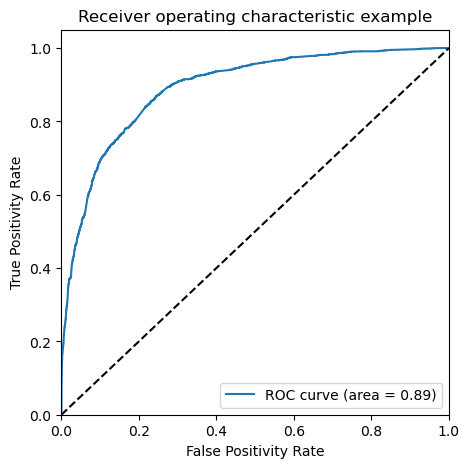

In [71]:
fpr, tpr, thresholds = roc_curve( y_Train_pred_final.Converted, y_Train_pred_final.Probabilities, drop_intermediate = False )
draw_roc(y_Train_pred_final.Converted,y_Train_pred_final.Probabilities)


Area under the ROC Curve is 89% 

In [72]:
# Create table for different Probabilities Cutoffs
nums = [float(x)/10 for x in range (10)]
for i in nums:
    y_Train_pred_final[i] = y_Train_pred_final.Probabilities.map(lambda x: 1 if x>i else 0)
y_Train_pred_final.head()

,Converted,Probabilities,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.347217,0,1,1,1,1,0,0,0,0,0,0
1,1,0.996303,1,1,1,1,1,1,1,1,1,1,1
2,1,0.374123,0,1,1,1,1,0,0,0,0,0,0
3,0,0.151600,0,1,1,0,0,0,0,0,0,0,0
4,0,0.167779,0,1,1,0,0,0,0,0,0,0,0


In [73]:
# Calculate Accuracy, Senstivity and Specificity for each cutoff point
cutoff_df = pd.DataFrame(columns=['Probability','Accuracy','Sensitivity','Specificity'])
for i in nums:
    conf_matrix = confusion_matrix(y_Train_pred_final.Converted, y_Train_pred_final[i])
    total = sum(sum(conf_matrix))
    TP1 = conf_matrix[1,1]
    TN1 = conf_matrix[0,0]
    FP1 = conf_matrix[0,1]
    FN1 = conf_matrix[1,0]
    accuracy = (TN1+TP1)/total
    sensitivity = TP1/(TP1+FN1)
    specificity = TN1/(TN1+FP1)
    cutoff_df.loc[i]= [i,accuracy,sensitivity,specificity]
cutoff_df

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.377880,1.000000,0.000000
0.1,0.1,0.629112,0.969302,0.422478
0.2,0.2,0.763070,0.915475,0.670498
0.3,0.3,0.798188,0.859966,0.760664
0.4,0.4,0.815033,0.764508,0.845722
0.5,0.5,0.822024,0.698486,0.897063
0.6,0.6,0.810106,0.625315,0.922350
0.7,0.7,0.784522,0.510093,0.951213
0.8,0.8,0.765613,0.430193,0.969349
0.9,0.9,0.719530,0.277544,0.987995


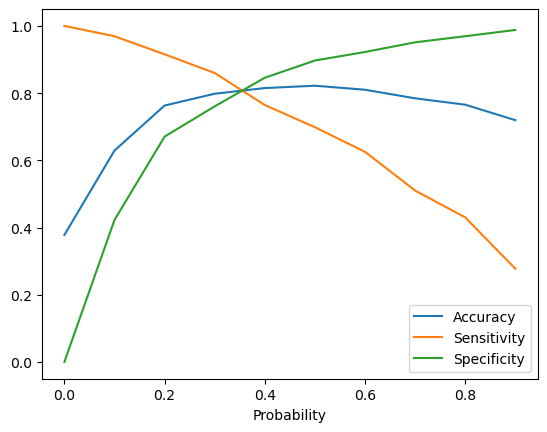

In [74]:
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()


from the graph plotted we can see that the cutoff is 0.35

In [75]:
#Add the column Final_Pred with cutoff greater than 0.35
y_Train_pred_final['Final_Predicted'] = y_Train_pred_final.Probabilities.map(lambda x: 1 if x > 0.35 else 0)
y_Train_pred_final.head()

,Converted,Probabilities,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.347217,0,1,1,1,1,0,0,0,0,0,0,0
1,1,0.996303,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.374123,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.151600,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.167779,0,1,1,0,0,0,0,0,0,0,0,0


In [76]:
confusion_matrix_final = confusion_matrix(y_Train_pred_final.Converted,y_Train_pred_final.Final_Predicted)
print(confusion_matrix_final)

[[3183  732]
 [ 480 1898]]


-           0       1
-   0       TN      FP
-   1       FN      TP 

In [77]:
TP_Final=confusion_matrix_final[1,1]
TN_Final=confusion_matrix_final[0,0]
FP_Final=confusion_matrix_final[0,1]
FN_Final=confusion_matrix_final[1,0]

In [78]:
# Calculate the Accuracy, Sensitivity and Specificity for the Cutoff
accuracy_Final  = accuracy_score(y_Train_pred_final.Converted,y_Train_pred_final.Final_Predicted)
Sensitivity_Final =TP_Final/(TP_Final+FN_Final)
Specificity_Final= TN_Final/(TN_Final+FP_Final)

In [79]:
print(f"Accuracy - {accuracy_Final}")
print(f"Sensitivity - {Sensitivity_Final}")
print(f"Specificity - {Specificity_Final}")

Accuracy - 0.8074050532337518
Sensitivity - 0.7981497056349874
Specificity - 0.8130268199233717


With the Cutoff set to 0.35 we have Accuracy, Sensitivity and Specificity around 80%

### Test Set Prediction

In [80]:
#Transform Numeric Values for Test Set
X_Test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_Test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [81]:
cols = X_Train_rfe.columns

In [82]:
X_test= X_Test[cols]
X_Test_sm = sm.add_constant(X_Test[cols])
X_Test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Unsubscribed,What is your current occupation_Working Professional,What matters most to you in choosing a course_NotProvided,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3308,1.0,0.117647,0.050176,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
4421,1.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8855,1.0,0.058824,0.547975,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5302,1.0,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
2169,1.0,0.588235,0.390405,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,1.0,0.058824,0.218310,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7836,1.0,0.588235,0.227113,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
8378,1.0,0.588235,0.179577,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1263,1.0,0.117647,0.376320,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [83]:
y_Test_pred = res.predict(X_Test_sm)
y_Pred_df = pd.DataFrame(y_Test_pred)
y_Test_df = pd.DataFrame(y_Test)
y_Pred_df.reset_index(drop=True,inplace=True)
y_Test_df.reset_index(drop=True,inplace=True)
y_Pred_final = pd.concat([y_Test_df,y_Pred_df],axis=1)
y_Pred_final= y_Pred_final.rename(columns={0:'ConversionProbability'})
y_Pred_final.head()

,Converted,ConversionProbability
0,0,0.059172
1,1,0.646753
2,1,0.429862
3,0,0.034442
4,0,0.252004


In [84]:
y_Pred_final['final_Predicted'] = y_Pred_final.ConversionProbability.map(lambda x: 1 if x>0.35 else 0)
y_Pred_final

,Converted,ConversionProbability,final_Predicted
0,0,0.059172,0
1,1,0.646753,1
2,1,0.429862,1
3,0,0.034442,0
4,0,0.252004,0
...,...,...,...
2693,1,0.137696,0
2694,1,0.840497,1
2695,0,0.164183,0
2696,1,0.958898,1


In [85]:
accuracy_score(y_Pred_final.Converted,y_Pred_final.final_Predicted)

0.8054114158636027

In [86]:
test_confusion  = confusion_matrix(y_Pred_final.Converted, y_Pred_final.final_Predicted)
test_confusion

array([[1357,  320],
       [ 205,  816]], dtype=int64)

In [87]:
TP_Test=test_confusion[1,1]
TN_Test=test_confusion[0,0]
FP_Test=test_confusion[0,1]
FN_Test=test_confusion[1,0]

In [88]:
accuracy_Test    = accuracy_score(y_Pred_final.Converted,y_Pred_final.final_Predicted)
Sensitivity_Test =TP_Test/(TP_Test+FN_Test)
Specificity_Test = TN_Test/(TN_Test+FP_Test)

In [89]:
print(f"Accuracy - {accuracy_Test}")
print(f"Sensitivity - {Sensitivity_Test}")
print(f"Specificity - {Specificity_Test}")

Accuracy - 0.8054114158636027
Sensitivity - 0.7992164544564153
Specificity - 0.8091830649970185


In [90]:
# Precision = TP / TP + FP
print(f"Precision - {TP_Test/(TP_Test+FP_Test)}")
#Recall = TP / TP + FN
print(f"Recall - {TP_Test/(TP_Test+FN_Test)}")

Precision - 0.7183098591549296
Recall - 0.7992164544564153


Precision is around 72% and Recall is around 80%

In [91]:
from sklearn.metrics import precision_recall_curve

In [92]:
p,r,threshold = precision_recall_curve(y_Pred_final.Converted,y_Pred_final.ConversionProbability)

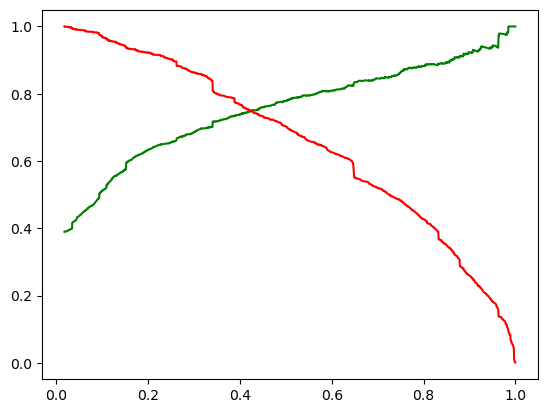

In [93]:
plt.plot(threshold, p[:-1], "g-")
plt.plot(threshold, r[:-1], "r-")
plt.show()

In [94]:
y_Train_pred_final['Final_Predicted'] = y_Train_pred_final.Probabilities.map(lambda x: 1 if x > 0.41 else 0)
y_Train_pred_final

,Converted,Probabilities,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.347217,0,1,1,1,1,0,0,0,0,0,0,0
1,1,0.996303,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.374123,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.151600,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.167779,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6288,1,0.570855,1,1,1,1,1,1,1,0,0,0,0,1
6289,1,0.426680,0,1,1,1,1,1,0,0,0,0,0,1
6290,1,0.922316,1,1,1,1,1,1,1,1,1,1,1,1
6291,0,0.061026,0,1,0,0,0,0,0,0,0,0,0,0


In [95]:
#Accuracy
accuracy_score(y_Train_pred_final.Converted,y_Train_pred_final.Final_Predicted)

0.8163038296519943

In [96]:
confusion2= confusion_matrix(y_Train_pred_final.Converted,y_Train_pred_final.Final_Predicted)
confusion2

array([[3332,  583],
       [ 573, 1805]], dtype=int64)

In [97]:
# True positive
TP = confusion2[1,1]
# True negatives
TN = confusion2[0,0]
# False positives
FP = confusion2[0,1] 
# False negatives
FN = confusion2[1,0]

In [98]:
# Calculate the Accuracy, Sensitivity and Specificity for the new Cutoff
accuracy  = accuracy_score(y_Train_pred_final.Converted,y_Train_pred_final.Final_Predicted)
Sensitivity =TP/(TP+FN)
Specificity = TN/(TN+FP)

In [99]:
print(f"Accuracy - {accuracy}")
print(f"Sensitivity - {Sensitivity}")
print(f"Specificity - {Specificity}")
# Precision = TP / TP + FP
print(f"Precision - {TP / (TP + FP)}")
print(f"Recall - {TP / (TP + FN)}")

Accuracy - 0.8163038296519943
Sensitivity - 0.7590412111017661
Specificity - 0.8510855683269476
Precision - 0.7558626465661642
Recall - 0.7590412111017661


With the current cut off as 0.41 we have Precision around 75% and Recall around 76% and accuracy 82 %.

Model predicts the Conversion rate very well and will give confidence to Organization in making good call based on this model.

## Conclusion

Following variables matter the most in deciding the potential lead in descending order. 

- TotalVisits	
- Total Time Spent on Website	
- Lead Origin_Lead Add Form	
- Lead Source_Direct Traffic	
- Lead Source_Google	
- Lead Source_Organic Search	
- Lead Source_Referral Sites	
- Lead Source_Welingak Website
- Last Activity_Email Bounced
- Last Activity_Olark Chat Conversation	
- Last Activity_Unsubscribed	